**NAME** : SANJITA S - 19PW29 & 
           SHRUTHI M - 19PW34

**TITLE** : CREDIT CARD FRAUD DETECTION

In [ ]:
# Importing libraries

%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score,roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [ ]:
data = pd.read_csv('creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df=data.loc[:, ['Time', 'Amount','Class']] #selecting data of interest
df.head()

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


**Exploratory Data Analysis**  

In [ ]:
df.describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
data.shape

(284807, 31)

In [ ]:
df.isna().sum()

Time      0
Amount    0
Class     0
dtype: int64

In [ ]:
df.dtypes

Time      float64
Amount    float64
Class       int64
dtype: object

**Visulaizations**

Univariate Data analysis

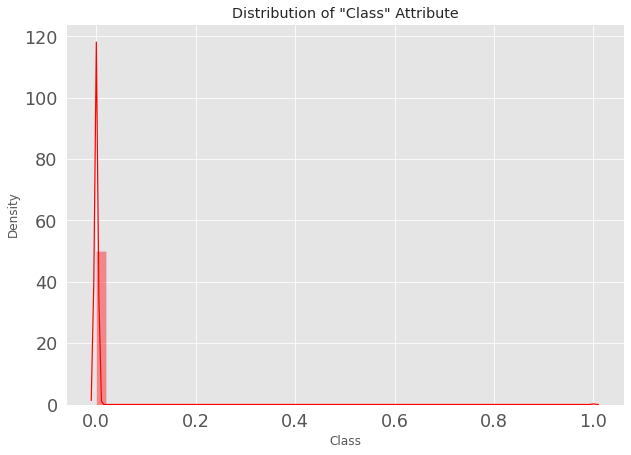

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Distribution of "Class" Attribute')

sns.distplot(df['Class'],color='red');

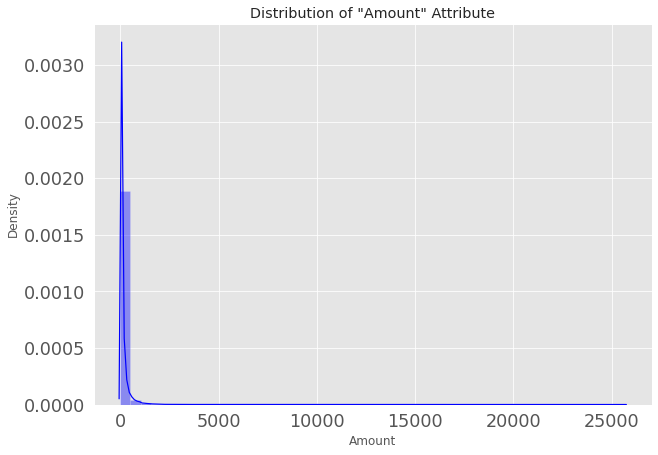

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Distribution of "Amount" Attribute')

sns.distplot(df['Amount'],color='blue');

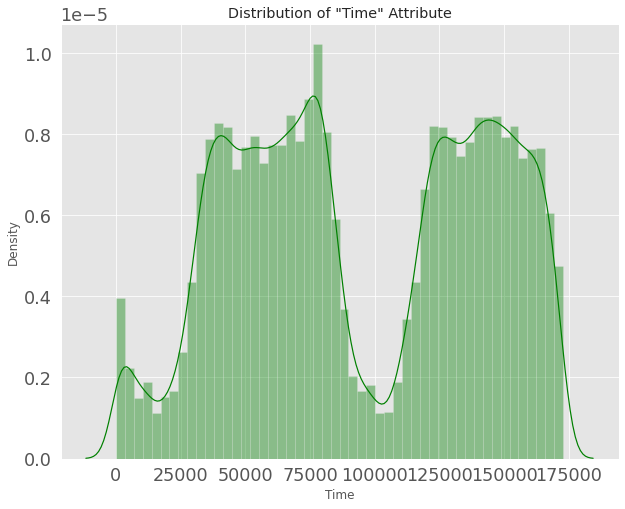

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Distribution of "Time" Attribute')

sns.distplot(df['Time'],color='green');

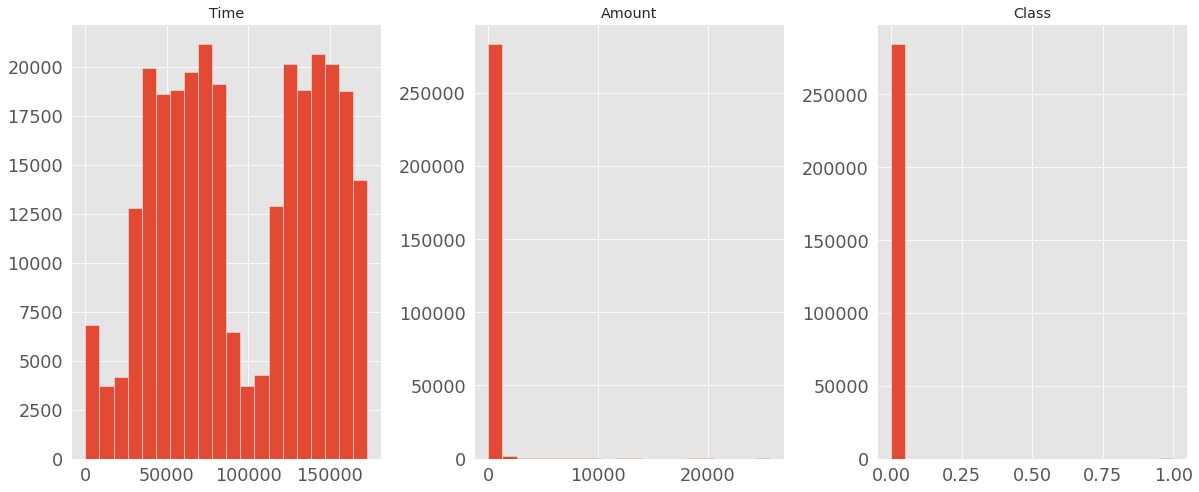

In [ ]:
df.hist(bins=20, figsize=(20,8),layout=(1,3)); #Histogram of all the attributes


In [ ]:
# Pair plots 

#sns.set(style="ticks")
#sns.pairplot(data[["V1","V2","V3","Class"]], hue="Class")

In [ ]:
df.corr() #Correlation among the various attributes


,Time,Amount,Class
Time,1.000000,-0.010596,-0.012323
Amount,-0.010596,1.000000,0.005632
Class,-0.012323,0.005632,1.000000


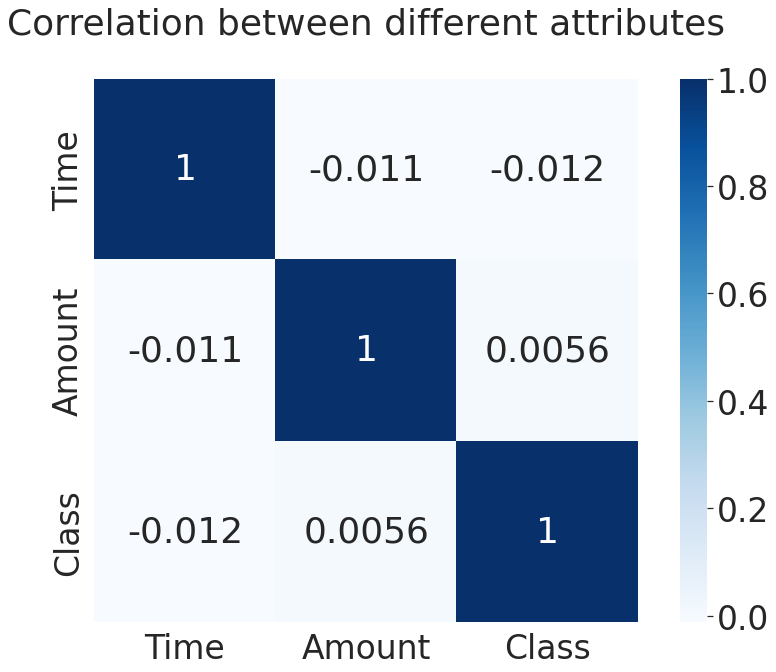

In [ ]:
#very low correlation among "Time","Amount" and "Class"

plt.figure(figsize=(15,10))
sns.set(font_scale=3)
sns.heatmap(df.corr(), vmax=1, square=True, annot=True,cmap='Blues')
plt.title('Correlation between different attributes\n')
plt.show()

In [ ]:
data.corr() #very less correlation among the various attributes because of PCA


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-

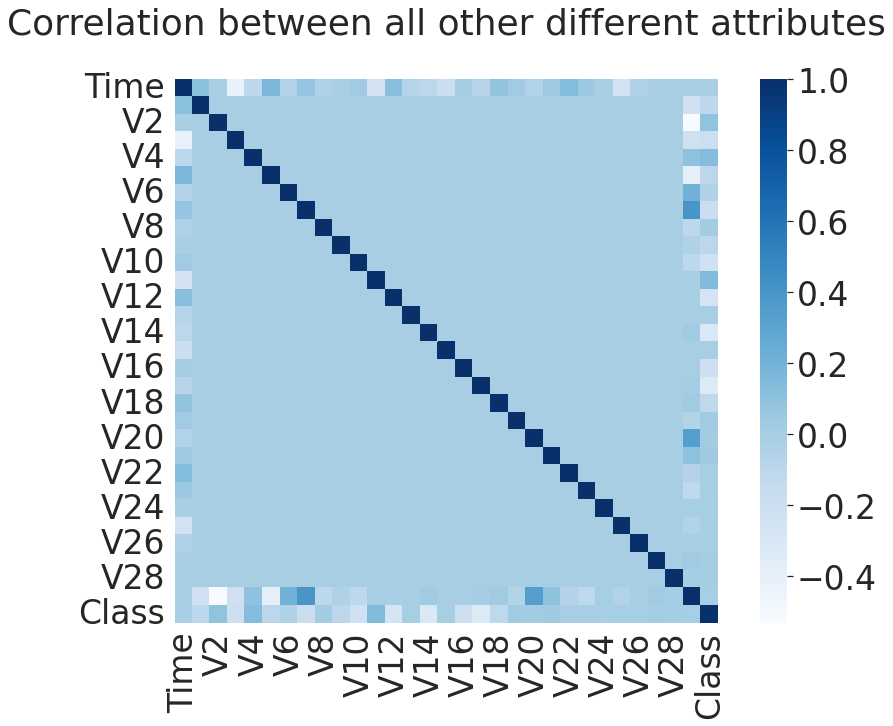

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(data.corr(), vmax=1, square=True,cmap='Blues')
plt.title('Correlation between all other different attributes\n')
plt.show()

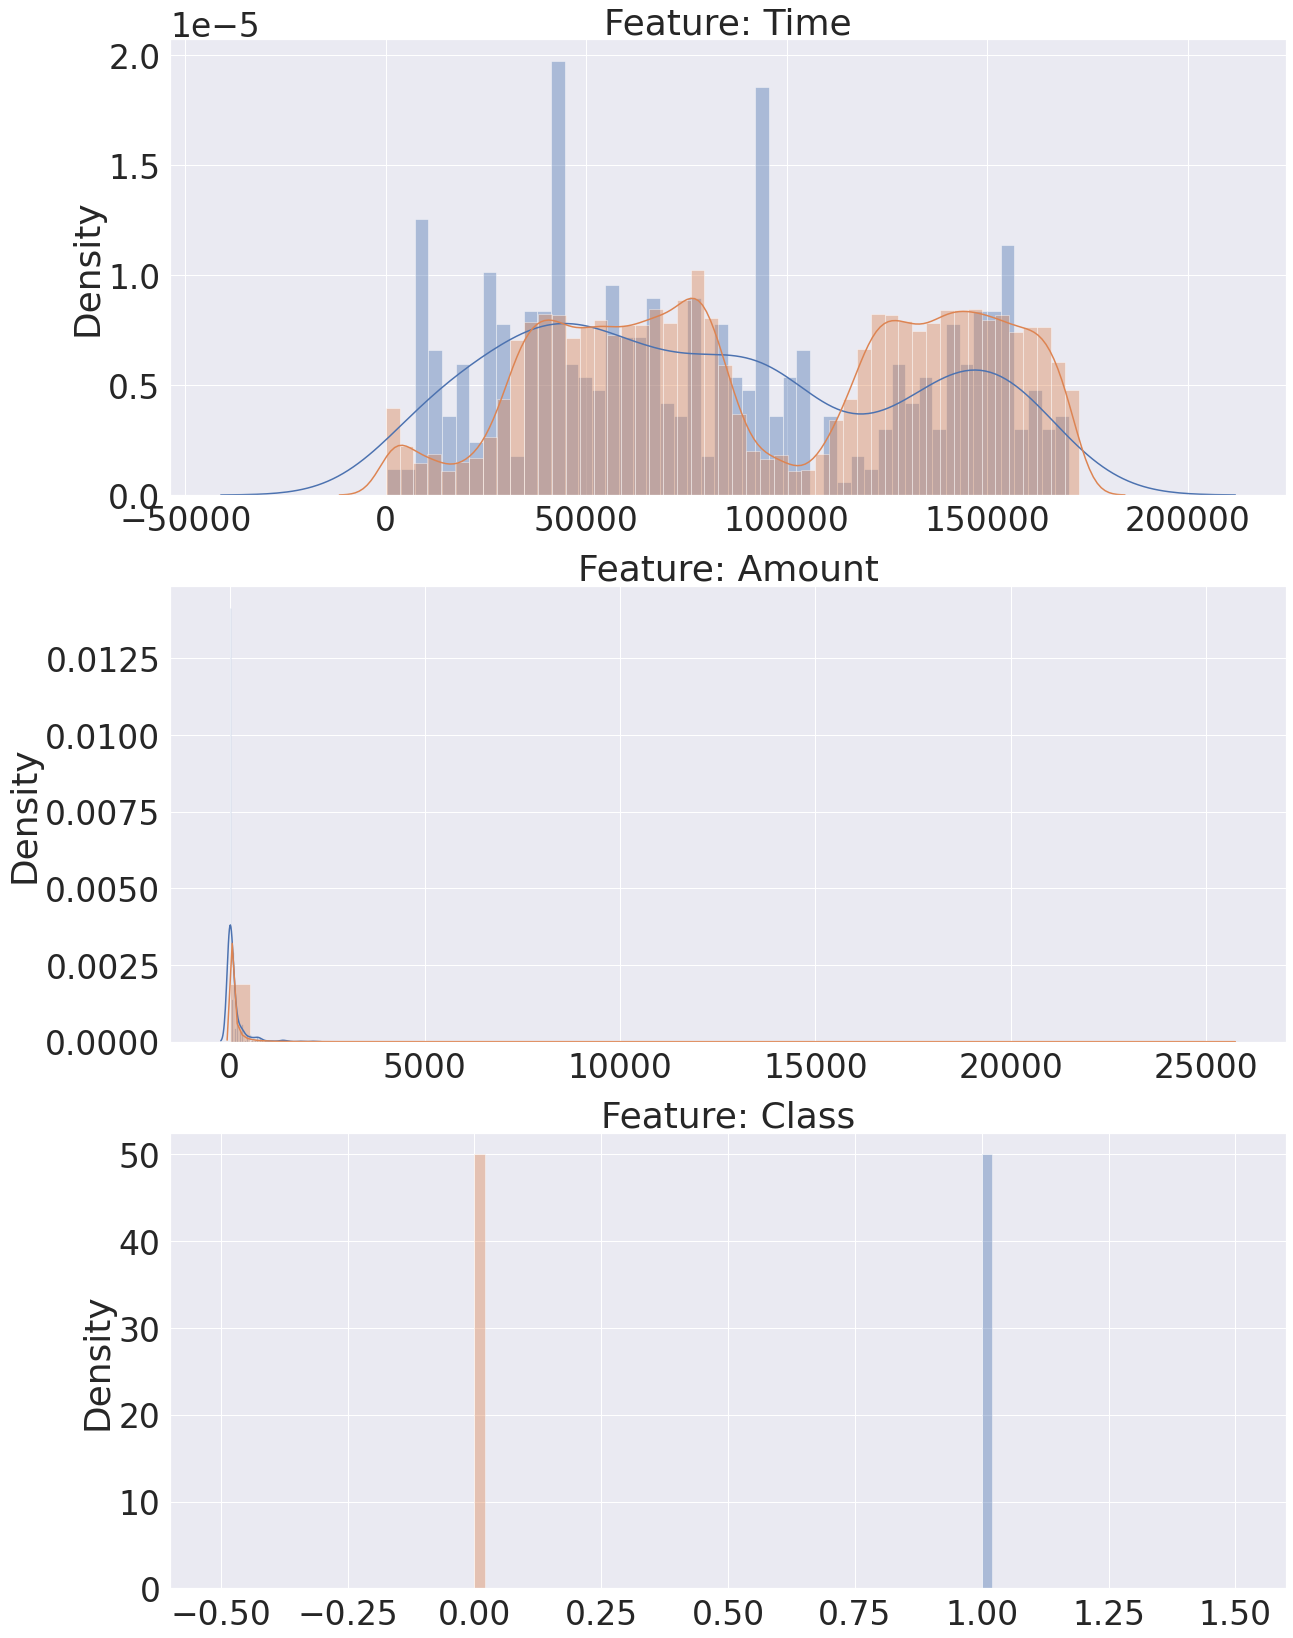

In [ ]:
plt.figure(figsize=(20,30*10))
import matplotlib.gridspec as gridspec
features = df.iloc[:,0:30].columns
gs = gridspec.GridSpec(30, 1)
for i, feature in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[feature][df.Class == 1], bins=50)
    sns.distplot(df[feature][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('Feature: ' + str(feature))
plt.show()

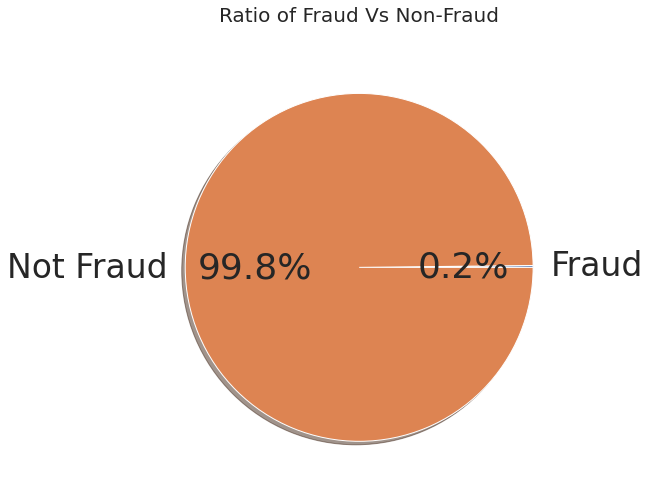

In [ ]:
fraud =len(df[df['Class']==1])
notfraud = len(df[df['Class']==0])

# Data to plot
labels = 'Fraud','Not Fraud'
sizes = [fraud,notfraud]

# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Ratio of Fraud Vs Non-Fraud\n', fontsize=20)
sns.set_context("paper", font_scale=2)

**Preparing data for modelling**

In [ ]:
# #Separating our data into Dependent and Independent variables

X = data.drop('Class',axis=1)
y = data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27) # setting up testing and training sets

In [ ]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
264873,161634.0,-0.395578,1.489129,-0.833442,-0.224271,0.369444,-1.453886,0.796593,-0.060403,0.338270,-0.343885,-0.647990,-0.509490,-0.633729,-0.712156,0.765701,0.053830,0.526211,0.750505,-0.225921,0.054132,0.231624,0.955194,-0.172092,-0.041050,-0.313444,-0.174301,0.064657,-0.036960,2.74,0
163821,116237.0,1.950487,0.002312,-1.761814,1.232470,0.523175,-0.650657,0.504231,-0.200857,0.116805,0.443750,0.257633,0.358875,-1.313311,0.922108,-1.078538,-0.395038,-0.437151,0.074223,0.187086,-0.285207,0.086306,0.326297,-0.068839,-0.416589,0.426044,-0.486299,-0.031266,-0.072543,38.44,0
72083,54557.0,1.105167,-0.166253,0.569520,0.681043,-0.259189,0.642792,-0.437034,0.356746,0.441417,-0.113006,1.263824,1.017046,-0.791270,0.181033,-0.530067,-0.733662,0.436861,-0.903134,-0.242185,-0.226981,0.009073,0.293023,-0.028688,-0.242206,0.389813,0.482852,0.010705,-0.008399,1.00,0
196949,131771.0,1.805238,0.961264,-1.717212,4.094625,0.938666,-0.227785,0.152911,0.066753,-1.073784,0.334537,1.016183,-0.510443,-0.748733,-2.708662,-1.014069,2.220866,1.285249,1.619087,-1.602343,-0.150818,-0.137875,-0.450959,0.098530,-0.662272,-0.150154,-0.098852,-0.000030,0.017622,37.89,0
126213,77959.0,0.835421,-1.191847,0.578455,0.586101,-1.236663,0.194617,-0.532404,0.061561,-0.734344,0.754427,0.513247,0.704388,0.472193,-0.072043,-0.357247,-1.136932,-0.436168,2.047641,-0.775130,-0.045313,-0.072349,-0.109154,-0.308356,0.011968,0.461350,-0.244810,0.031845,0.060910,237.00,0


**Using Dummy Classifier to verify the inbalance data output**


In [ ]:
# DummyClassifier will end up predicting only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', np.unique(dummy_pred))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [0]
Test score:  0.9981461194910255


**Upsampling**

In [ ]:
# separate minority and majority classes
from sklearn.utils import resample

not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()

1    213245
0    213245
Name: Class, dtype: int64

**ALGORITHMS IN UPSAMPLED CLASS**

In [ ]:
y_train_up = upsampled.Class
X_train_up = upsampled.drop('Class', axis=1)

upsampled_log = LogisticRegression(solver='liblinear').fit(X_train_up, y_train_up)
upsampled_pred1 = upsampled_log.predict(X_test)

upsampled_randf = RandomForestClassifier(n_estimators=10).fit(X_train_up, y_train_up)
upsampled_pred2 = upsampled_randf.predict(X_test)

gnb_up = GaussianNB()
gnb_best_up = gnb_up.fit(X_train_up, y_train_up)
upsampled_pred3 = gnb_best_up.predict(X_test)

''''C = [1]
gammas = [0.001, 0.1]
param_grid = dict(C=C, gamma=gammas)
svm1 = svm.SVC(kernel='rbf', probability=True)
svm_grid = GridSearchCV(svm1, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
svm_grid.fit(X_train_up, y_train_up)
upsampled_pred4 = svm_grid.predict(X_test)'''

'''from sklearn.neighbors import KNeighborsClassifier
n = 5
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train_up, y_train_up)
upsampled_pred5 = KNN.predict(X_test)'''


from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train_up, y_train_up)
upsampled_pred6 = xgb.predict(X_test)

In [ ]:
print()
print(" LOGISTIC REGRESSION ")
print()
print(" ACCURACY  : " ,accuracy_score(y_test, upsampled_pred1))
print(" PRECISION : " ,precision_score(y_test, upsampled_pred1))
print(" F-SCORE   : ", f1_score(y_test, upsampled_pred1))
print(" RECALL    : " ,recall_score(y_test, upsampled_pred1))

print()
print(" RANDOM FOREST ")
print()
print(" ACCURACY  : " ,accuracy_score(y_test, upsampled_pred2))
print(" PRECISION : " ,precision_score(y_test, upsampled_pred2))
print(" F-SCORE   : ", f1_score(y_test, upsampled_pred2))
print(" RECALL    : " ,recall_score(y_test, upsampled_pred2))

print()
print(" GAUSSIAN NAIVE BAYES")
print()
print(" ACCURACY  : " ,accuracy_score(y_test, upsampled_pred3))
print(" PRECISION : " ,precision_score(y_test, upsampled_pred3))
print(" F-SCORE   : ", f1_score(y_test, upsampled_pred3))
print(" RECALL    : " ,recall_score(y_test, upsampled_pred3))

print()
print(" XG BOOST ")
print()
print(" ACCURACY  : " ,accuracy_score(y_test, upsampled_pred6))
print(" PRECISION : " ,precision_score(y_test, upsampled_pred6))
print(" F-SCORE   : ", f1_score(y_test, upsampled_pred6))
print(" RECALL    : " ,recall_score(y_test, upsampled_pred6))



 LOGISTIC REGRESSION 

 ACCURACY  :  0.9807589674447347
 PRECISION :  0.07833787465940055
 F-SCORE   :  0.14375000000000002
 RECALL    :  0.8712121212121212

 RANDOM FOREST 

 ACCURACY  :  0.9995505744220669
 PRECISION :  0.9716981132075472
 F-SCORE   :  0.8655462184873949
 RECALL    :  0.7803030303030303

 GAUSSIAN NAIVE BAYES

 ACCURACY  :  0.9912923794275442
 PRECISION :  0.14431486880466474
 F-SCORE   :  0.24205378973105138
 RECALL    :  0.75

 XG BOOST 

 ACCURACY  :  0.9980618521951631
 PRECISION :  0.48717948717948717
 F-SCORE   :  0.6229508196721312
 RECALL    :  0.8636363636363636


LOGISTIC REGRESSION 

In [ ]:
X_train_Hard = X_train.to_numpy()
Y_train_Hard = y_train.to_numpy()
X_test_Hard = X_test.to_numpy()
Y_test_Hard = y_test.to_numpy()


In [ ]:
plain = LogisticRegression(solver='liblinear').fit(X_train_Hard, Y_train_Hard)
plain_pred = plain.predict(X_test_Hard)
print()
print(" ACCURACY  : " ,accuracy_score(Y_test_Hard, plain_pred))
print(" PRECISION : " ,precision_score(Y_test_Hard, plain_pred))
print(" F-SCORE   : ", f1_score(Y_test_Hard, plain_pred))
print(" RECALL    : " ,recall_score(Y_test_Hard, plain_pred))

print()
print(' Confusion Matrix\n')
pd.DataFrame(confusion_matrix(Y_test_Hard, plain_pred))


 ACCURACY  :  0.9991011488441336
 PRECISION :  0.8863636363636364
 F-SCORE   :  0.7090909090909092
 RECALL    :  0.5909090909090909

 Confusion Matrix



,0,1
0,71060,10
1,54,78


**Downsampling**

In [ ]:
# Downsample majority

not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()

1    360
0    360
Name: Class, dtype: int64

**ALGORITHMS IN DOWNSAMPLED CLASS**

In [ ]:
y_train_d = downsampled.Class
X_train_d = downsampled.drop('Class', axis=1)

undersampled_log = LogisticRegression(solver='liblinear').fit(X_train_d, y_train_d)
undersampled_pred1 = undersampled_log.predict(X_test)

undersampled_randf = RandomForestClassifier(n_estimators=10).fit(X_train_d, y_train_d)
undersampled_pred2 = undersampled_randf.predict(X_test)

gnb_d = GaussianNB()
gnb_best_d = gnb_d.fit(X_train_d, y_train_d)
undersampled_pred3 = gnb_best_d.predict(X_test)


from xgboost import XGBClassifier

xgb_d = XGBClassifier(max_depth = 4)
xgb_d.fit(X_train_d, y_train_d)
undersampled_pred6 = xgb_d.predict(X_test)

In [ ]:
print()
print(" LOGISTIC REGRESSION ")
print()
print(" ACCURACY  : " ,accuracy_score(y_test, undersampled_pred1))
print(" PRECISION : " ,precision_score(y_test, undersampled_pred1))
print(" F-SCORE   : ", f1_score(y_test, undersampled_pred1))
print(" RECALL    : " ,recall_score(y_test, undersampled_pred1))

print()
print(" RANDOM FOREST ")
print()
print(" ACCURACY  : " ,accuracy_score(y_test, undersampled_pred2))
print(" PRECISION : " ,precision_score(y_test, undersampled_pred2))
print(" F-SCORE   : ", f1_score(y_test, undersampled_pred2))
print(" RECALL    : " ,recall_score(y_test, undersampled_pred2))

print()
print(" GAUSSIAN NAIVE BAYES")
print()
print(" ACCURACY  : " ,accuracy_score(y_test, undersampled_pred3))
print(" PRECISION : " ,precision_score(y_test, undersampled_pred3))
print(" F-SCORE   : ", f1_score(y_test, undersampled_pred3))
print(" RECALL    : " ,recall_score(y_test, undersampled_pred3))

print()
print(" XG BOOST ")
print()
print(" ACCURACY  : " ,accuracy_score(y_test, undersampled_pred6))
print(" PRECISION : " ,precision_score(y_test, undersampled_pred6))
print(" F-SCORE   : ", f1_score(y_test, undersampled_pred6))
print(" RECALL    : " ,recall_score(y_test, undersampled_pred6))



 LOGISTIC REGRESSION 

 ACCURACY  :  0.9758574197354007
 PRECISION :  0.0628099173553719
 F-SCORE   :  0.11710323574730355
 RECALL    :  0.8636363636363636

 RANDOM FOREST 

 ACCURACY  :  0.9812786157692199
 PRECISION :  0.07918710581639804
 F-SCORE   :  0.14496472097498397
 RECALL    :  0.8560606060606061

 GAUSSIAN NAIVE BAYES

 ACCURACY  :  0.9875284402123535
 PRECISION :  0.10210526315789474
 F-SCORE   :  0.17929759704251386
 RECALL    :  0.7348484848484849

 XG BOOST 

 ACCURACY  :  0.9725569506474537
 PRECISION :  0.058195926285160036
 F-SCORE   :  0.10938924339106654
 RECALL    :  0.9090909090909091


**Generate Synthetic samples- SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27)
X_train1, y_train1 = sm.fit_resample(X_train1, y_train1)

In [ ]:

smote_log = LogisticRegression(solver='liblinear').fit(X_train1, y_train1)
smote_pred1 = smote_log.predict(X_test1)

smote_randf = RandomForestClassifier(n_estimators=10).fit(X_train1, y_train1)
smote_pred2 = smote_randf.predict(X_test1)

smote_gnb = GaussianNB()
smote_gnb = smote_gnb.fit(X_train1, y_train1)
smote_pred3 = smote_gnb.predict(X_test1)


from xgboost import XGBClassifier

smote_xgb = XGBClassifier(max_depth = 4)
smote_xgb.fit(X_train1, y_train1)
smote_pred6 = smote_xgb.predict(X_test1)





In [ ]:
print()
print(" LOGISTIC REGRESSION ")
print()
print(" ACCURACY  : " ,accuracy_score(y_test, smote_pred1))
print(" PRECISION : " ,precision_score(y_test, smote_pred1))
print(" F-SCORE   : ", f1_score(y_test, smote_pred1))
print(" RECALL    : " ,recall_score(y_test, smote_pred1))

print()
print(" RANDOM FOREST ")
print()
print(" ACCURACY  : " ,accuracy_score(y_test, smote_pred2))
print(" PRECISION : " ,precision_score(y_test, smote_pred2))
print(" F-SCORE   : ", f1_score(y_test, smote_pred2))
print(" RECALL    : " ,recall_score(y_test, smote_pred2))

print()
print(" GAUSSIAN NAIVE BAYES")
print()
print(" ACCURACY  : " ,accuracy_score(y_test, smote_pred3))
print(" PRECISION : " ,precision_score(y_test, smote_pred3))
print(" F-SCORE   : ", f1_score(y_test, smote_pred3))
print(" RECALL    : " ,recall_score(y_test, smote_pred3))

print()
print(" XG BOOST ")
print()
print(" ACCURACY  : " ,accuracy_score(y_test, smote_pred6))
print(" PRECISION : " ,precision_score(y_test, smote_pred6))
print(" F-SCORE   : ", f1_score(y_test, smote_pred6))
print(" RECALL    : " ,recall_score(y_test, smote_pred6))



 LOGISTIC REGRESSION 

 ACCURACY  :  0.8951714839470801
 PRECISION :  0.0035211267605633804
 F-SCORE   :  0.006918573709419904
 RECALL    :  0.19696969696969696

 RANDOM FOREST 

 ACCURACY  :  0.9360692115390017
 PRECISION :  0.008888888888888889
 F-SCORE   :  0.017271157167530225
 RECALL    :  0.30303030303030304

 GAUSSIAN NAIVE BAYES

 ACCURACY  :  0.3934580489312098
 PRECISION :  0.0019434097586932882
 F-SCORE   :  0.003874985584131011
 RECALL    :  0.6363636363636364

 XG BOOST 

 ACCURACY  :  0.8283053846802056
 PRECISION :  0.006367866764633847
 F-SCORE   :  0.012599951538647928
 RECALL    :  0.5909090909090909


Counter({0: 284315, 1: 492})


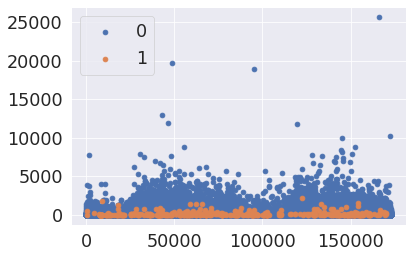

Counter({0: 213245, 1: 213245})


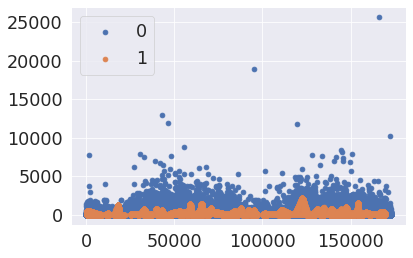

In [ ]:
X1  = X.to_numpy()
y1 = y.to_numpy()

from collections import Counter
from numpy import where
counter = Counter(y1)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y1 == label)[0]
	plt.scatter(X1[row_ix, 0], X1[row_ix, 1], label=str(label))
plt.legend()
plt.show()




X_train1 = X_train1.to_numpy()
y_train1 = y_train1.to_numpy()

from collections import Counter
from numpy import where
counter = Counter(y_train1)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y_train1 == label)[0]
	plt.scatter(X_train1[row_ix, 0], X_train1[row_ix, 1], label=str(label))
plt.legend()
plt.show()



**RANDOM FOREST**

In [ ]:
randf = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
randf_pred = randf.predict(X_test)

print()
print(" ACCURACY  : " ,accuracy_score(y_test, randf_pred))
print(" PRECISION : " ,precision_score(y_test, randf_pred))
print(" F-SCORE   : ", f1_score(y_test, randf_pred))
print(" RECALL    : " ,recall_score(y_test, randf_pred))



 ACCURACY  :  0.9996207971686188
 PRECISION :  0.981651376146789
 F-SCORE   :  0.8879668049792531
 RECALL    :  0.8106060606060606


In [ ]:
pd.DataFrame(confusion_matrix(y_test1, randf_pred))

,0,1
0,71068,2
1,25,107


**NAIVE BAYES GAUSSIAN**

In [ ]:
gnb = GaussianNB()
gnb_best = gnb.fit(X_train, y_train)

# predict on test set
gnb_pred = gnb_best.predict(X_test)

print(" ACCURACY  : " ,accuracy_score(y_test, gnb_pred))
print(" PRECISION : " ,precision_score(y_test, gnb_pred))
print(" F-SCORE   : ", f1_score(y_test, gnb_pred))
print(" RECALL    : " ,recall_score(y_test, gnb_pred))

 ACCURACY  :  0.993567596415831
 PRECISION :  0.1765873015873016
 F-SCORE   :  0.279874213836478
 RECALL    :  0.6742424242424242


In [ ]:
pd.DataFrame(confusion_matrix(y_test, gnb_pred))

,0,1
0,70655,415
1,43,89


**GridSearchCV-Support Vector Classifier**

In [ ]:
# Run CV with 5 folds (SVM)

C = [1]
gammas = [0.001, 0.1]
param_grid = dict(C=C, gamma=gammas)

svm1 = svm.SVC(kernel='rbf', probability=True)
svm_grid = GridSearchCV(svm1, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [ ]:
# predict on test set
grid_pred = svm_grid.predict(X_test)

print()
print(" ACCURACY  : " ,accuracy_score(y_test, grid_pred))
print(" PRECISION : " ,precision_score(y_test, grid_pred))
print(" F-SCORE   : ", f1_score(y_test, grid_pred))
print(" RECALL    : " ,recall_score(y_test, grid_pred))

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
n = 5
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)

print()
print(" ACCURACY  : " ,accuracy_score(y_test, knn_yhat))
print(" PRECISION : " ,precision_score(y_test, knn_yhat))
print(" F-SCORE   : ", f1_score(y_test, knn_yhat))
print(" RECALL    : " ,recall_score(y_test, knn_yhat))

In [ ]:
'''
def KNN(k,test_data,X_train,y_train):
    distanceList=[]
    for i in range(len(X_train)):
        x=list(X_train[i])
        distance=0
        for j in range(len(test_data)):
            distance+=(x[j]-test_data[j])**2
        distance=np.sqrt(distance)
        distanceList.append(distance)
    dList=np.argsort(distanceList)
    non_fraud=0
    fraud=0
    for i in range(k):
        if y_train[dList[i]]==1:
            fraud+=1
        else:
            non_fraud+=1
    if non_fraud > fraud:
        return 0
    else:
        return 1

'''

In [ ]:
'''
def KNN_prediction(k,X_test,X_train,y_train):
    predictions=[]
    for i in range(len(X_test)):
        predictions.append(KNN(k,X_test[i],X_train,y_train))
        print()
        print(f'K Value:{k}')
        print(" ACCURACY  : " ,accuracy_score(y_test, np.array(predictions)))
        print(" PRECISION : " ,precision_score(y_test,np.array(predictions)))
        print(" F-SCORE   : ", f1_score(y_test, np.array(predictions)))
        print(" RECALL    : " ,recall_score(y_test, np.array(predictions)))
    return predictions
'''



In [ ]:
'''
X_test = X_test.to_numpy()
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
def all_KNN():
    K=[k for k in range(1,10,2)]
    for k in K:
        KNN_prediction(k,X_test,X_train,y_train)
all_KNN()
'''

**XG Boost**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)


print()
print(" ACCURACY  : " ,accuracy_score(y_test, xgb_yhat))
print(" PRECISION : " ,precision_score(y_test, xgb_yhat))
print(" F-SCORE   : ", f1_score(y_test, xgb_yhat))
print(" RECALL    : " ,recall_score(y_test, xgb_yhat))

**ROC**

In [ ]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 4, figsize = (20,15))


#----------Dummy---------


dummy_pred = dummy.predict(X_test)
fprdm, tprdm, thresholddm = metrics.roc_curve(y_test,dummy_pred)
roc_aucxgb = metrics.auc(fprdm,tprdm)

ax_arr[0,0].plot(fprdm,  tprdm, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Dummy ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})


#----------Logistics---------

undersampled_pred = undersampled.predict(X_test)
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, undersampled_pred)
roc_aucxgb = metrics.auc(fprlog, tprlog)

ax_arr[0,1].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Logistic',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})


#----------SMOTE---------


smote_pred = smote.predict(X_test1)
#preds = probs[:,1]
fprsm, tprsm, thresholdsm = metrics.roc_curve(y_test, smote_pred)
roc_aucxgb = metrics.auc(fprsm, tprsm)


ax_arr[0,2].plot(fprsm, tprsm, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('SMOTE ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})



#----------GaussianNB---------

gnb_pred = gnb_best.predict(X_test)
#preds = probs[:,1]
fprgnb, tprgnb, thresholdgnd = metrics.roc_curve(y_test, gnb_pred)
roc_aucxgb = metrics.auc(fprgnb, tprgnb)


ax_arr[0,3].plot(fprgnb, tprgnb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,3].plot([0, 1], [0, 1],'r--')
ax_arr[0,3].set_title('GaussianNB',fontsize=20)
ax_arr[0,3].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,3].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,3].legend(loc = 'lower right', prop={'size': 16})


#----------Random Forest---------


randf_pred = randf.predict(X_test)
#preds = probs[:,1]
fprfst, tprfst, thresholdfst = metrics.roc_curve(y_test, randf_pred)
roc_aucxgb = metrics.auc(fprfst, tprfst)


ax_arr[1,0].plot(fprfst, tprfst, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('RandomForest ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})


#----------GridsearchCV(SVM)---------


grid_pred = svm_grid.predict(X_test)
fprgsv, tprgsv, thresholdgsv = metrics.roc_curve(y_test, grid_pred )
roc_aucxgb = metrics.auc(fprgsv,  tprgsv)


ax_arr[1,1].plot(fprgsv,  tprgsv, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('GridsearchCV(SVM) ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})


#----------XG Boost---------

xgb_yhat = xgb.predict(X_test)
fprxg, tprxg, thresholdxg = metrics.roc_curve(y_test,xgb_yhat )
roc_aucxgb = metrics.auc(fprxg,  tprxg)


ax_arr[1,2].plot(fprxg,  tprxg, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[1,2].plot([0, 1], [0, 1],'r--')
ax_arr[1,2].set_title('XG Boost ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})


#----------ALL---------


ax_arr[1,3].plot(fprdm, tprdm, 'b', label = 'Dummy', color='black')
ax_arr[1,3].plot(fprlog, tprlog, 'b', label = 'Logistic', color='blue')
ax_arr[1,3].plot(fprsm, tprsm, 'b', label = 'SMOTE', color='brown')
ax_arr[1,3].plot(fprgnb, tprgnb, 'b', label = 'GuassianNB', color='green')
ax_arr[1,3].plot(fprfst, tprfst, 'b', label = 'Randomforest', color='grey')
ax_arr[1,3].plot(fprgsv,  tprgsv, 'b', label = 'GridsearchCV(SVM)', color='pink')
ax_arr[1,3].plot(fprxg,  tprxg, 'b', label = 'XG Boost', color='purple')
ax_arr[1,3].set_title('Comparison ',fontsize=20)
ax_arr[1,3].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,3].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,3].legend(loc = 'lower right', prop={'size': 10})


**CONCLUSION :**

The AUC OF 'XG BOOST' is the most highest as shown in the above graph for this particular dataset.